In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

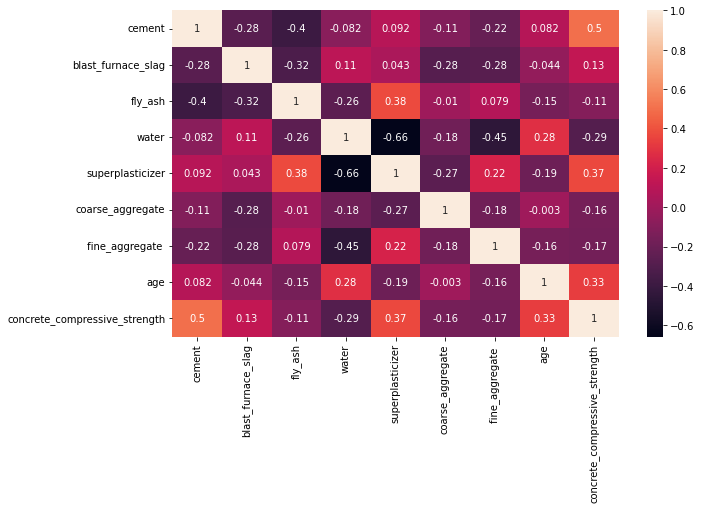

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

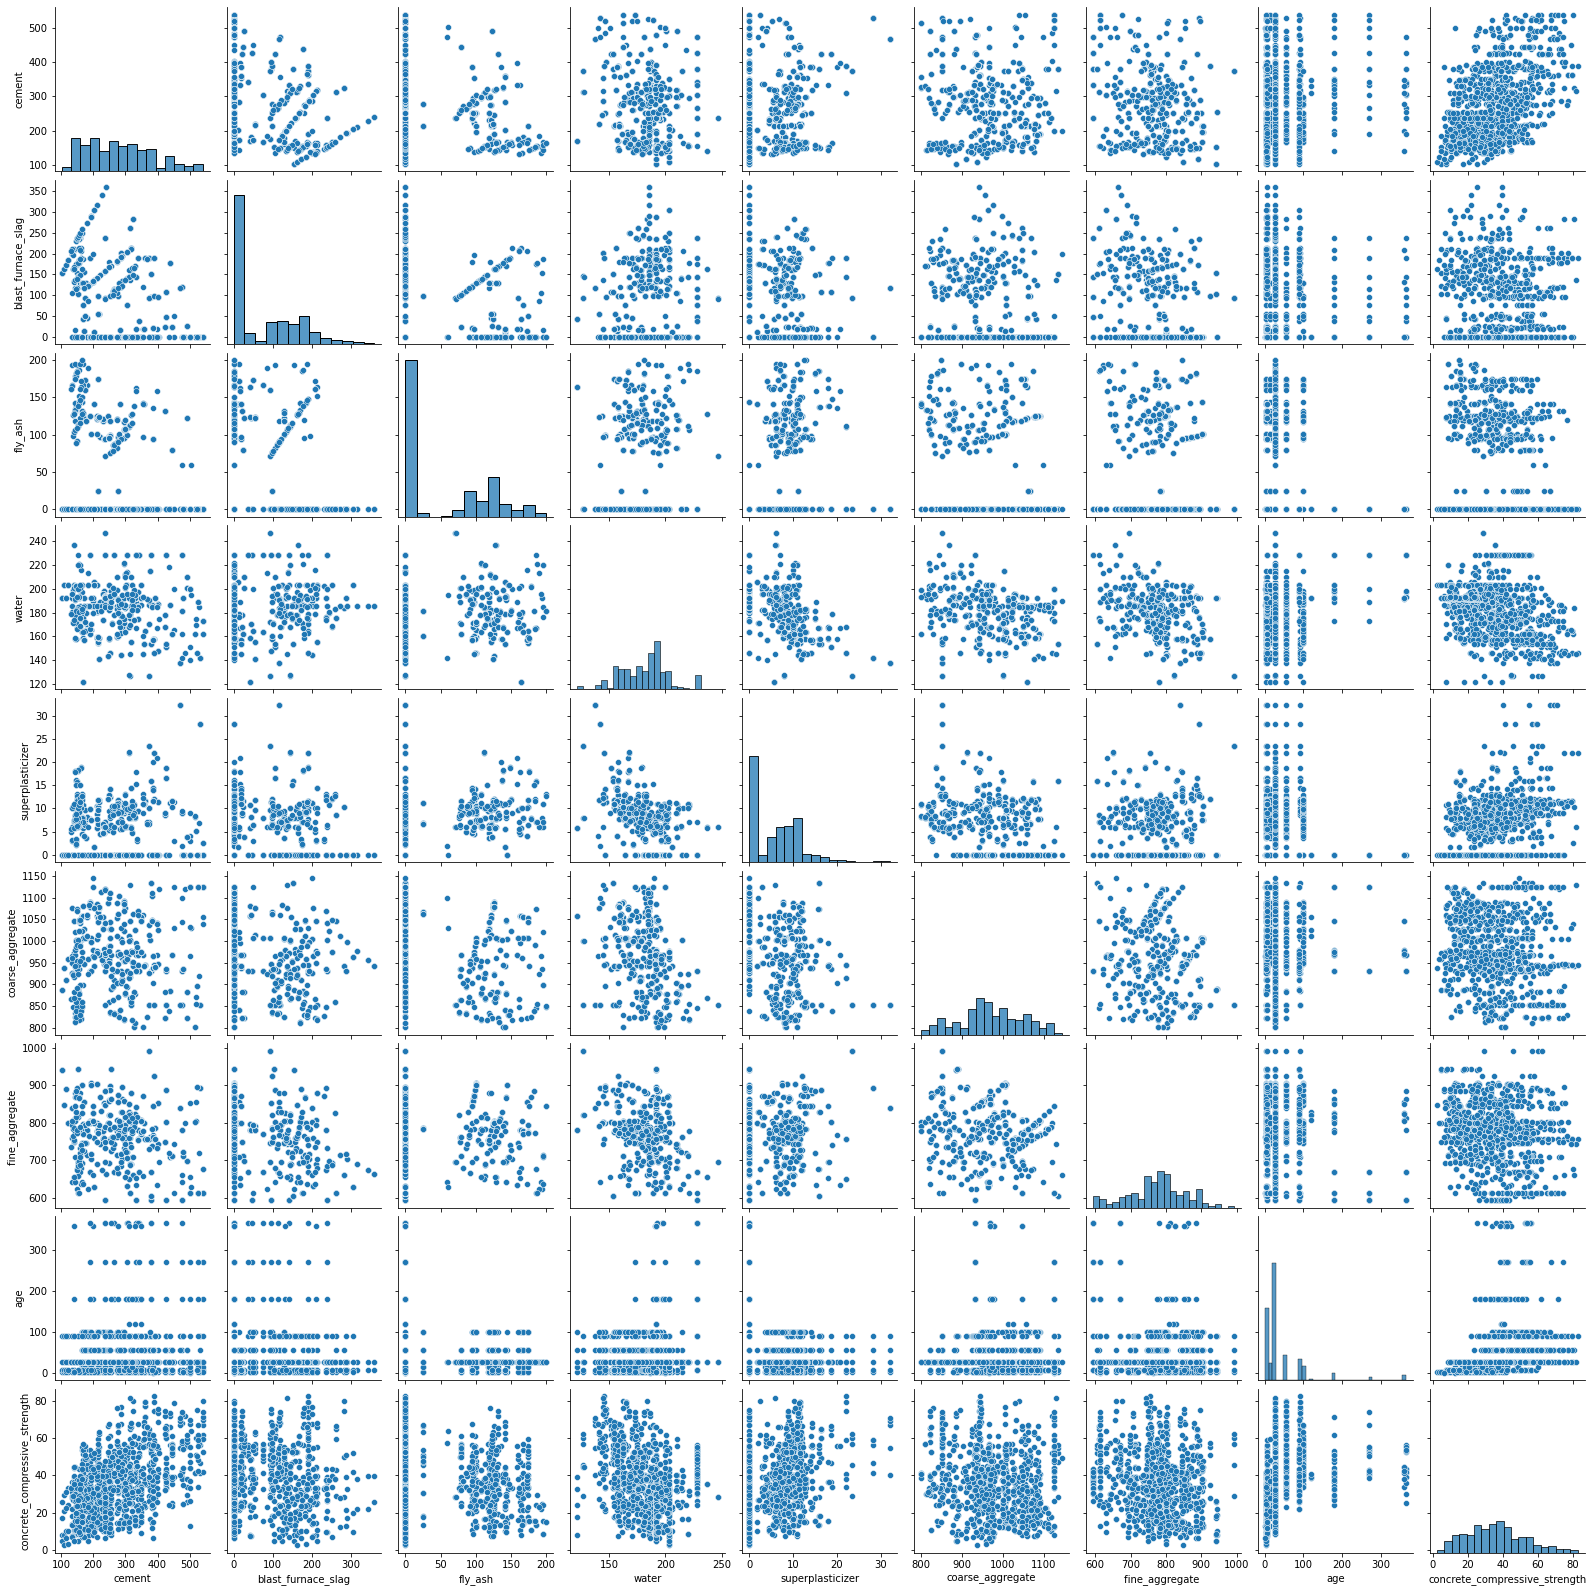

In [7]:
sns.pairplot(data=df)

In [22]:
x = df.drop('concrete_compressive_strength', axis=1)

In [23]:
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [24]:
y = df['concrete_compressive_strength']

In [25]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [26]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])

In [27]:
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


<AxesSubplot:>

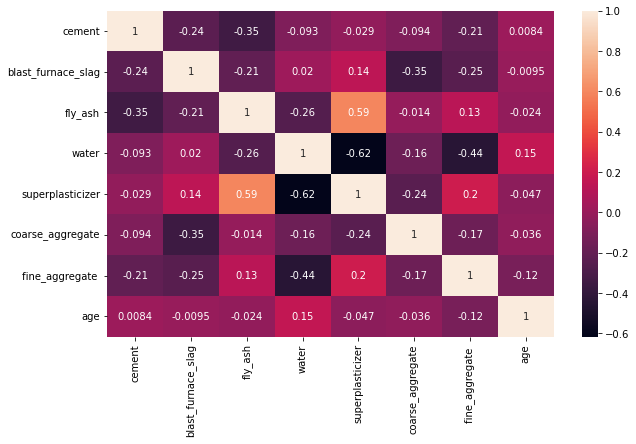

In [28]:
plt.figure(figsize=(10,6),facecolor='white')
sns.heatmap(x.corr(), annot=True)

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
196,5.276583,0.000000,4.620059,5.115596,2.140066,6.915128,6.810032,3.367296
631,5.786897,0.000000,0.000000,5.220356,0.000000,6.969791,6.664409,2.079442
81,5.767696,5.363637,0.000000,5.054333,2.727853,6.748877,6.781512,1.386294
526,5.886104,2.995732,4.955827,5.043425,2.476538,6.849066,6.687109,1.386294
830,5.093750,5.252273,5.003946,5.192957,2.995732,6.732211,6.609349,3.367296
...,...,...,...,...,...,...,...,...
87,5.660527,5.307773,0.000000,4.981550,2.501436,6.913340,6.690470,1.386294
330,5.512622,0.000000,4.837075,4.971894,2.564949,6.991913,6.686984,2.708050
466,5.253843,0.000000,4.837868,5.121580,2.388763,6.984716,6.684487,4.615121
121,6.165418,4.785824,0.000000,5.204556,2.292535,6.748877,6.662494,3.367296


In [31]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
31,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,5.902633
109,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,2.079442
136,5.968452,5.247024,0.000000,4.989752,3.135494,6.851925,6.629099,3.367296
88,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,1.386294
918,4.983607,0.000000,5.192957,5.313206,2.197225,6.715383,6.768493,3.367296
...,...,...,...,...,...,...,...,...
250,5.525453,0.000000,4.571613,5.238567,1.871802,6.864743,6.759487,2.708050
377,5.932245,0.000000,0.000000,5.373425,0.000000,6.912245,6.637782,4.043051
615,5.627621,0.000000,0.000000,5.257495,0.000000,6.876265,6.753438,5.198497
9,6.165418,0.000000,0.000000,5.433722,0.000000,6.838405,6.388561,3.367296


In [32]:
y_train

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: concrete_compressive_strength, Length: 721, dtype: float64

In [33]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: concrete_compressive_strength, Length: 309, dtype: float64

In [35]:
scalar = StandardScaler()

In [36]:
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)

In [37]:
X_train= pd.DataFrame(X_train,columns=x_train.columns)

In [38]:
X_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-0.775786,-1.059842,1.087816,-0.732865,0.609990,0.446070,1.557137,0.083653
1,0.529909,-1.059842,-0.866631,0.159575,-1.235750,1.120282,0.189325,-1.091401
2,0.480779,1.160607,-0.866631,-1.254755,1.116938,-1.604481,1.289248,-1.723837
3,0.783739,0.180337,1.229857,-1.347679,0.900187,-0.368739,0.402538,-1.723837
4,-1.243583,1.114505,1.250213,-0.073834,1.347976,-1.810041,-0.327842,0.083653
...,...,...,...,...,...,...,...,...
716,0.206576,1.137481,-0.866631,-1.874789,0.921661,0.424012,0.434106,-1.723837
717,-0.171855,-1.059842,1.179621,-1.957041,0.976439,1.393135,0.401367,-0.517851
718,-0.833969,-1.059842,1.179957,-0.681884,0.824484,1.304375,0.377911,1.222184
719,1.498394,0.921403,-0.866631,0.024978,0.741490,-1.604481,0.171336,0.083653


In [39]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)


In [40]:
X_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,0.019086,0.904475,-0.866631,1.977220,-1.235750,-0.500233,-1.272573,2.396927
1,0.809198,1.112332,-0.866631,-0.768734,0.949485,-0.333474,-0.142336,-1.091401
2,0.994435,1.112332,-0.866631,-1.804914,1.468516,-0.333474,-0.142336,0.083653
3,0.809198,1.112332,-0.866631,-0.768734,0.949485,-0.333474,-0.142336,-1.723837
4,-1.525397,-1.059842,1.330172,0.950556,0.659288,-2.017590,1.166969,0.083653
...,...,...,...,...,...,...,...,...
304,-0.139025,-1.059842,1.067322,0.314718,0.378621,-0.175376,1.082378,-0.517851
305,0.901797,-1.059842,-0.866631,1.463555,-1.235750,0.410513,-0.060777,0.700221
306,0.122383,-1.059842,-0.866631,0.475963,-1.235750,-0.033273,1.025557,1.754464
307,1.498394,-1.059842,-0.866631,1.977220,-1.235750,-0.500233,-2.401663,0.083653


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [42]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}


In [44]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [45]:
from sklearn.metrics import r2_score

In [46]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

0.7957031494706376
0.7956527573152304
0.7944141268694541
0.7748426106102166
0.8218886797261455
0.7856005718229286
0.8856218599832062
0.8911114370898644
0.7787229997863869
